# MTData: Grid Example

It is becoming more common for MT data to be collected in a grid rather than a profile because of 3D inversions.  In this example we can take a look at how to work with MT data collected on a grid.  We will use the same MTCollection from the first example.  

## 1. Load data

First we will open the MTCollection and change the working dataframe to get only those station in the 'grid' survey.

In [1]:
from pathlib import Path
from mtpy import MTCollection

In [2]:
with MTCollection() as mtc:
    mtc.open_collection(Path().cwd().joinpath("test_mt_collection.h5"))
    mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == "grid"]
    mtd = mtc.to_mt_data()

23:10:19T17:22:24 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\docs\source\notebooks\test_mt_collection.h5


## 2. Plot Station Locations

To make sure we got the data we expected, we can plot the station locations.  You can change the basemap, see [providers](https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers) for more details

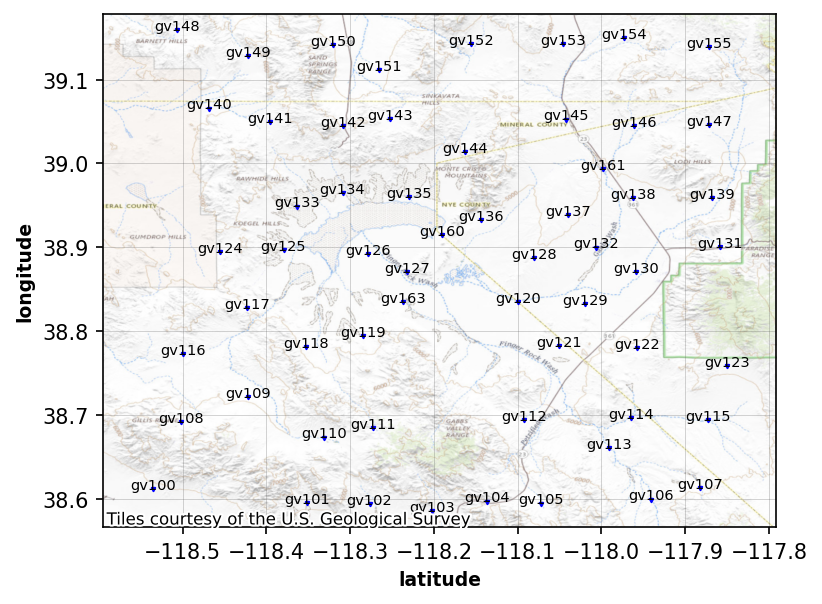

In [3]:
station_plot = mtd.plot_stations()

### 2a. Change basemap

Here is an example of how to change the basemap.  We it to use the ESRI terrain map.

In [4]:
import contextily as cx

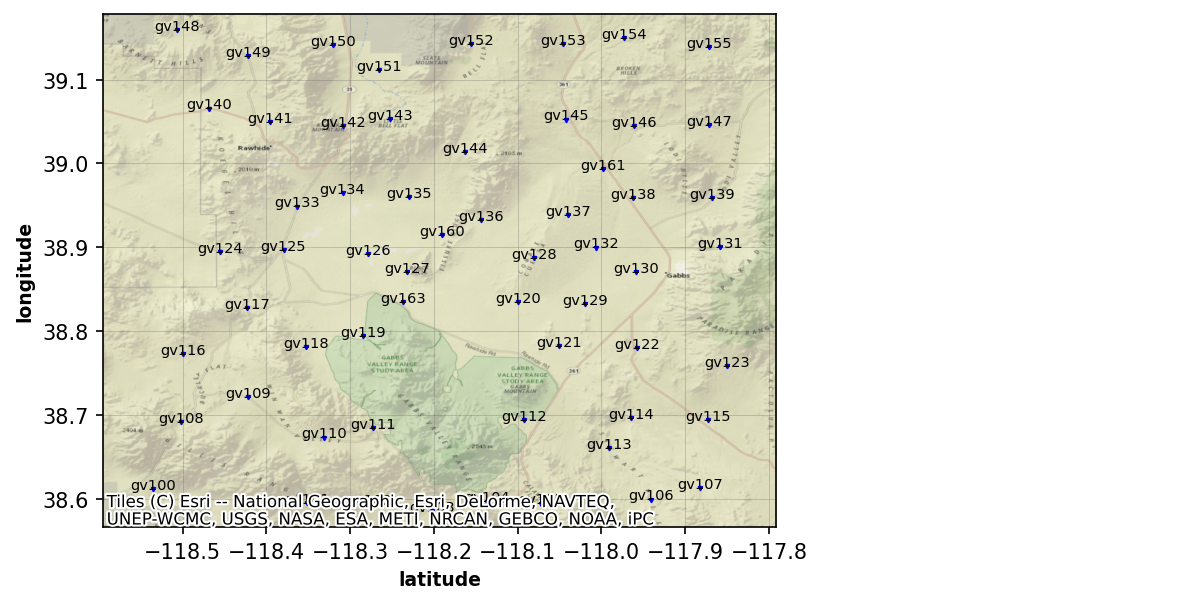

In [5]:
station_plot.cx_source = cx.providers.Esri.NatGeoWorldMap
station_plot.redraw_plot()

## 3. Plot Phase Tensor Map

Now that we seem to have the correct data, lets plot phase tensor maps.  These are broadband data with induction vectors, so lets plot those too.  The phase tensor map is busy so lets identify key aspects.  

 - Ellipse shape: the ellipses often elongate in the preferred direction of current flow
 - Ellipse face color: by default are colored by the parameter `phimin` but can be changed by setting the attribute `pt_map.ellipse_colorby`. The `phimin` gives the lower bounds on how the subsurface resistivity is changing, where reds are becoming more conductive and blues are becoming more resistive. 
 - Ellipse edge color: by default is colored by the `skew` angle which is indicative of dimensionality with high skew being 3D. Also the color indicates in which direction currents are being skewed.  
 - Wedges: the long axis is `phimax` and the short axis are `phimin`.
 - Arrows: black are real induction vectors and blue are imaginary induction vectors.

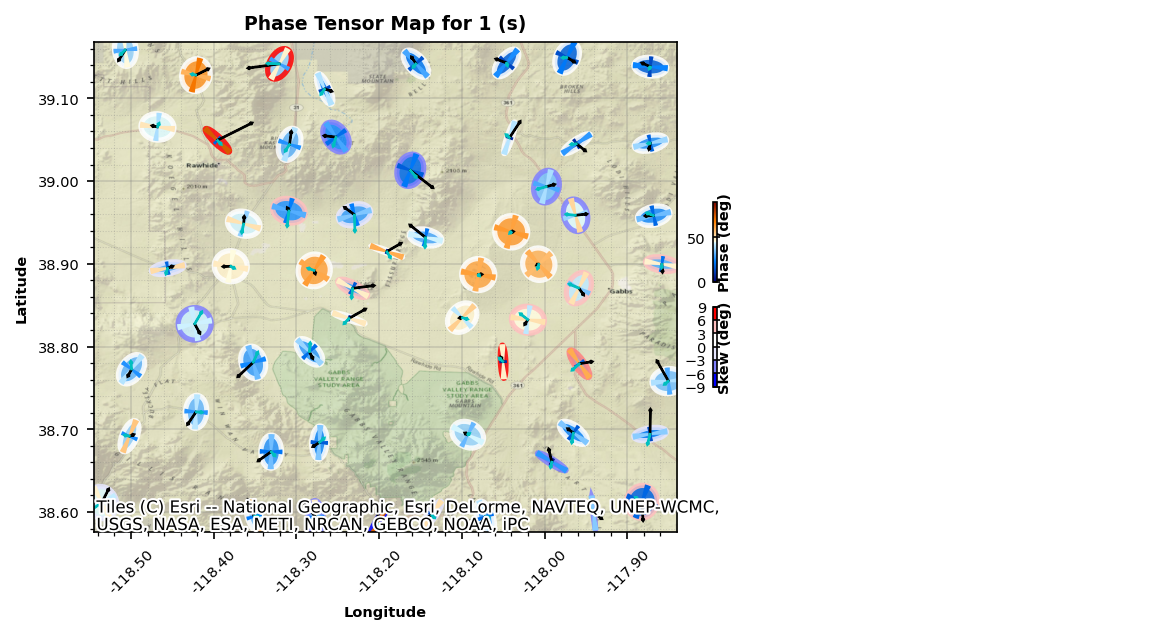

In [6]:
pt_map = mtd.plot_phase_tensor_map(
    plot_tipper="yri", 
    cx_source=cx.providers.Esri.NatGeoWorldMap,
    ellipse_size=.02,
    arrow_size=.05
)

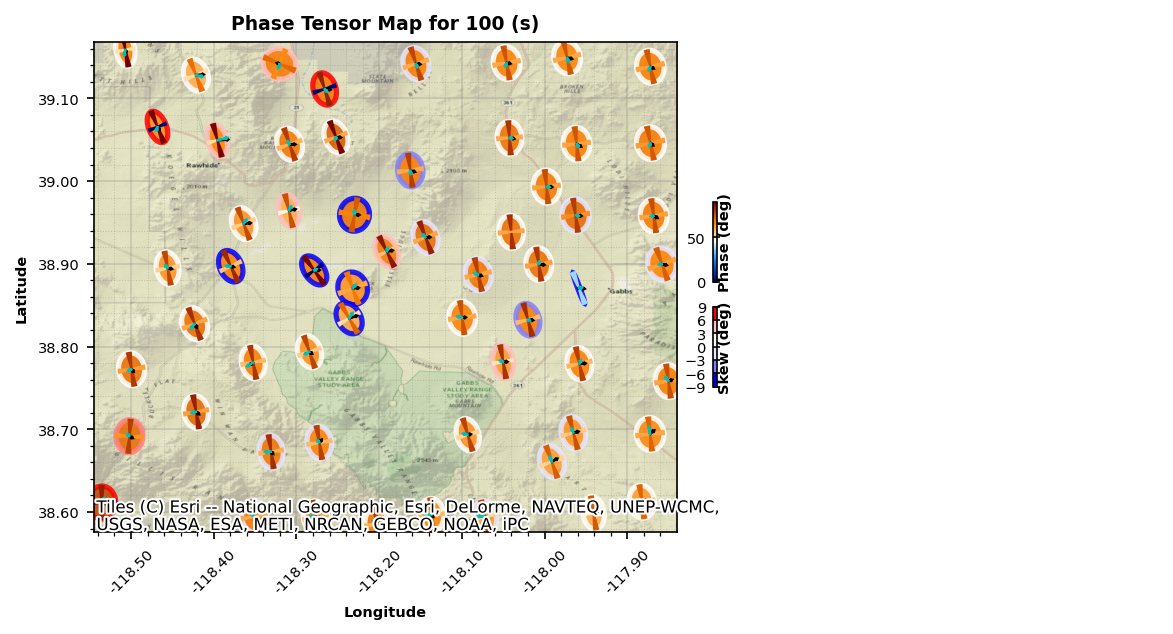

In [7]:
pt_map.plot_period = 100
pt_map.redraw_plot()

## 4. Plot Resistivity and Phase Maps

An informative first order check on the data is to plot apparent resistivity and phase maps of the data.  This can help identify odd stations for further investigations and get a general idea of subsurface resistivity changes. These plots are a little messy in a Jupyter Notebook.

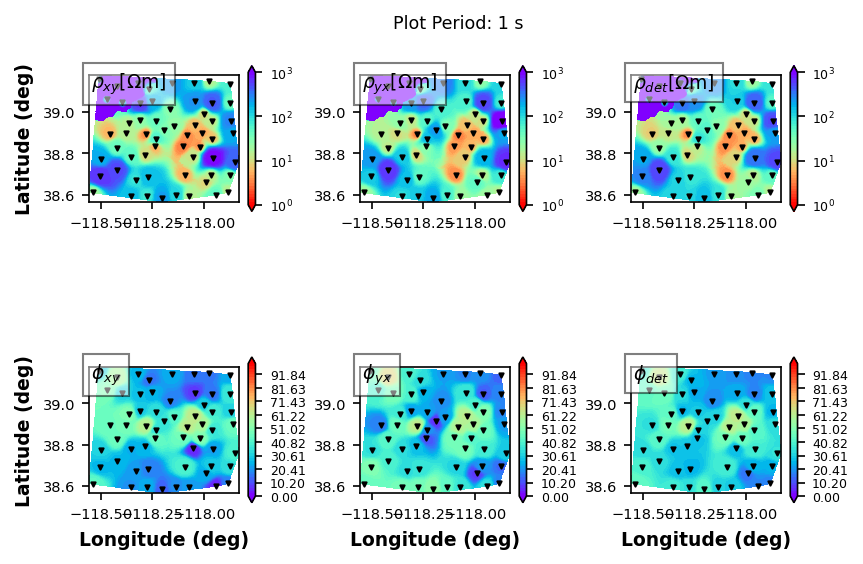

In [8]:
rp_map = mtd.plot_resistivity_phase_maps(plot_det=True, subplot_wspace=.45, marker_size=4)

### 4a. Plot Diagonal Components

It can be informative to plot the diagnoal components as well, in this case they outline the basins nicely.

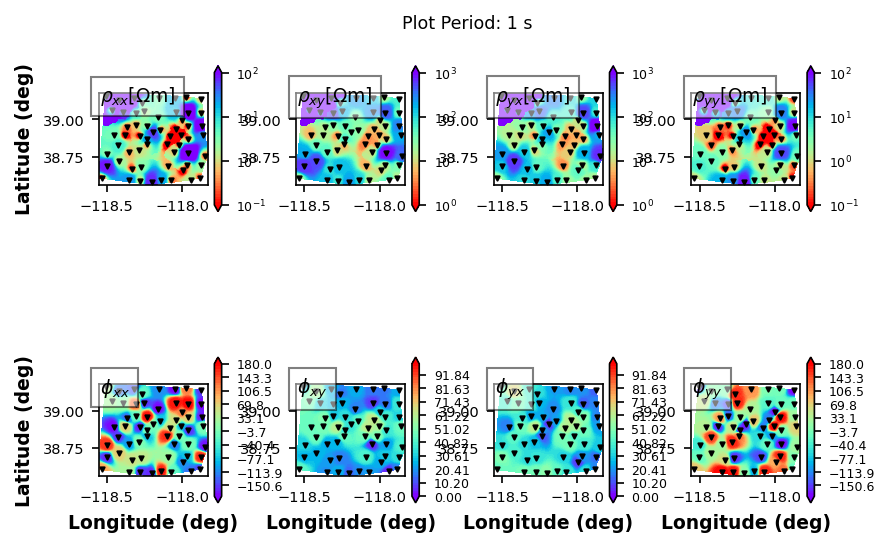

In [9]:
rp_map.plot_xx = True
rp_map.plot_yy = True
rp_map.plot_det = False
rp_map.redraw_plot()

## 5. Plot Depth of Investigation

It can also be informative to understand how deep the measurements are sensitive to.  Here a Niblett-Bostick approximation is used to estimate the depth of penetration for each station at a single period.  

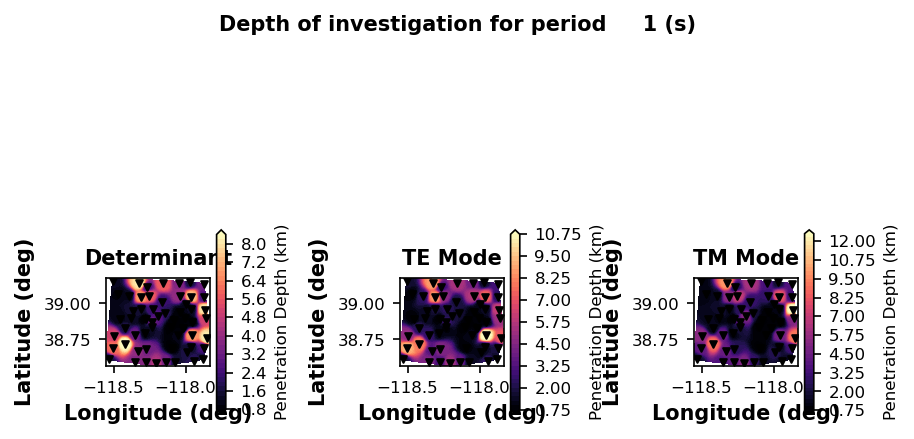

In [10]:
depth_of_penetration = mtd.plot_penetration_depth_map(subplot_wspace=.35)

## 6. Plot Strike

Here we will plot all periods of estimated strike. Notice that the plot includes the strike as estimated from the invariants (left) of [Weaver et al. (2002)](https://doi.org/10.1046/j.1365-246x.2000.00089.x), the phase tensor (middel) of [Caldwell et al. (2004)](https://doi.org/10.1111/j.1365-246X.2004.02281.x), and the induction vector strike.  

<div class="alert alert-block alert-warning">
<b>Important:</b> The induction strike points towards good conductors so should therefore be perpendicular to the impedance strike.  We left it this way as a sanity check on strike angles.
</div>  

### 6a. Plot all periods in one plot

This plot shows all strike estimations for all stations for all periods.   

23:10:19T17:24:05 | INFO | line:892 |mtpy.imaging.plot_strike | _plot_all_periods | Note: North is assumed to be 0 and the strike angle is measured clockwise positive.


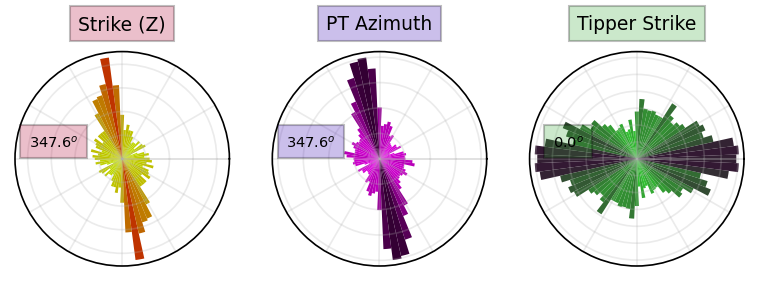

In [11]:
strike_plot = mtd.plot_strike()

### 6b. Strike per period

23:10:19T17:37:21 | INFO | line:793 |mtpy.imaging.plot_strike | _plot_per_period | Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


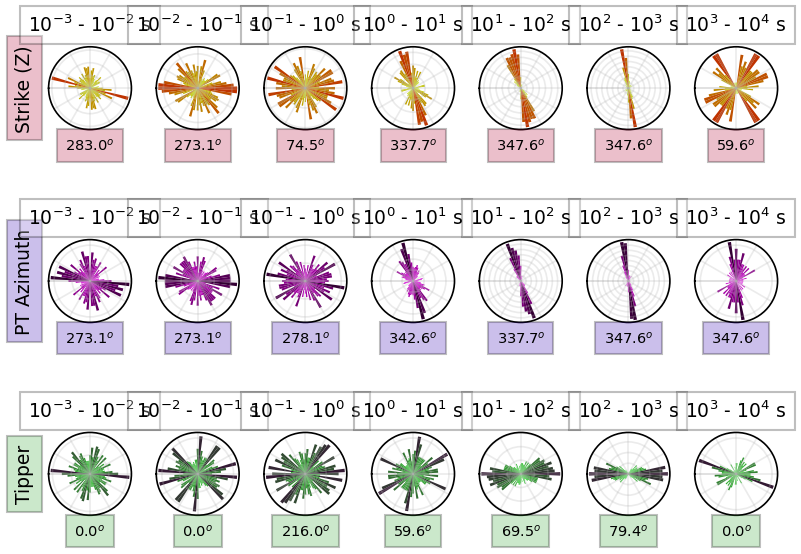

In [16]:
strike_plot.plot_type = 1
strike_plot.redraw_plot()

TypeError: 'int' object is not callable

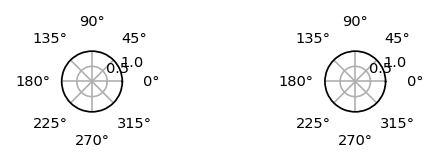

In [17]:
strike_plot.plot_orientation = "vertical"
strike_plot.redraw_plot()

In [15]:
strike_plot.get_mode(strike_plot.strike_df.loc[strike_plot.strike_df.estimate=="tipper"])

0.0